In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pickle
import pandas as pd
# Imports

%config InlineBackend.figure_format = 'svg' 
plt.style.use('bmh')


# Data Loading

In [2]:
data_seb = pickle.load(open("/home/slerique/Code/nw2vec/data/behaviour/colors/S2_S3-ov_noov-n_nodes=1000-n_clusters=100-n_alphas=10-n_models=20-n_clusterings=2-df.pkl","rb"))
results_rel_Δ_dim_ξ = data_seb.pivot_table(columns='Δ_dim_ξ',
                                          index=['alpha_id', 'clustering_id', 'model_type',
                                                 'sampling_id', 'loss'],
                                          values='weighted best')
results_rel_Δ_dim_ξ = results_rel_Δ_dim_ξ.apply(
    lambda x: (x - results_rel_Δ_dim_ξ[0]) / results_rel_Δ_dim_ξ[0])
data_seb = results_rel_Δ_dim_ξ.stack().reset_index().rename(columns={0: 'weighted best'})

In [3]:
data_seb_overlap = data_seb[data_seb.model_type=="overlap"].drop(["model_type"],axis=1)
data_seb_no_overlap = data_seb[data_seb.model_type=="no-overlap"].drop(["model_type"],axis=1)

In [4]:
data_seb_overlap_clust2 = data_seb_overlap[data_seb_overlap.clustering_id==1].drop("clustering_id",axis=1)
data_seb_no_overlap_clust2 = data_seb_no_overlap[data_seb_no_overlap.clustering_id==1].drop("clustering_id",axis=1)

In [5]:
data_seb_clust2_loss_overlap = data_seb_overlap_clust2[data_seb_overlap_clust2.loss=="loss"].drop("loss",axis=1)
data_seb_clust2_adj_loss_overlap  = data_seb_overlap_clust2[data_seb_overlap_clust2.loss=="p_adj_loss"].drop("loss",axis=1)
data_seb_clust2_fts_loss_overlap  = data_seb_overlap_clust2[data_seb_overlap_clust2.loss=="p_v_loss"].drop("loss",axis=1)
data_seb_clust2_div_loss_overlap  = data_seb_overlap_clust2[data_seb_overlap_clust2.loss=="q_mulogS_flat_loss"].drop("loss",axis=1)

data_seb_clust2_loss_no_overlap = data_seb_no_overlap_clust2[data_seb_no_overlap_clust2.loss=="loss"].drop("loss",axis=1)
data_seb_clust2_adj_loss_no_overlap  = data_seb_no_overlap_clust2[data_seb_no_overlap_clust2.loss=="p_adj_loss"].drop("loss",axis=1)
data_seb_clust2_fts_loss_no_overlap  = data_seb_no_overlap_clust2[data_seb_no_overlap_clust2.loss=="p_v_loss"].drop("loss",axis=1)
data_seb_clust2_div_loss_no_overlap  = data_seb_no_overlap_clust2[data_seb_no_overlap_clust2.loss=="q_mulogS_flat_loss"].drop("loss",axis=1)

# Loss Boxplots

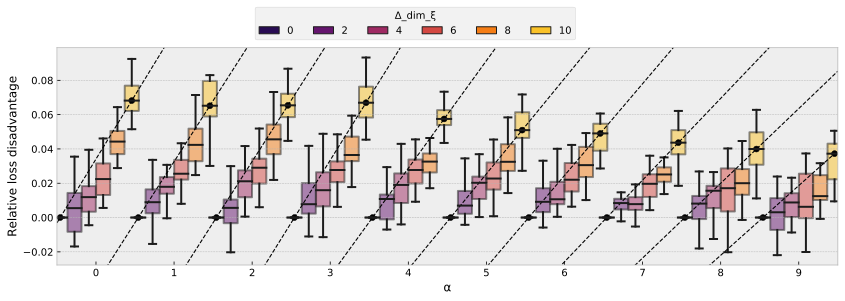

In [6]:
# Plotting Functions
def extended(ax, x, y, **args):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x_ext = np.linspace(xlim[0], xlim[1], 100)
    p = np.polyfit(x, y , deg=1)
    y_ext = np.poly1d(p)(x_ext)
    ax.plot(x_ext, y_ext, **args)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    return ax

# Plotting Data
full_width = 1.1
med_data = data_seb_clust2_loss_overlap.groupby(["alpha_id",
                                                     "Δ_dim_ξ"])["weighted best"].median().reset_index()
nb_boxes = 6
alpha_list = 10
centers = full_width/(2*nb_boxes)
X=(np.repeat(np.atleast_2d(np.arange(10)),nb_boxes, axis=0)+\
    np.array([[-x*centers-centers]for x in range(-nb_boxes,nb_boxes,2,)]))[::-1].transpose().flatten()
Y = np.array([med_data[med_data.alpha_id==alpha]["weighted best"] for alpha in range(alpha_list)]).flatten()
idx = list(range(0,X.shape[0]+1,nb_boxes))

# Figures
fig,ax = plt.subplots(1,1,figsize=(14,4))
sns.boxplot(x="alpha_id",y="weighted best", hue="Δ_dim_ξ", showfliers=False,
            data=data_seb_clust2_loss_overlap,width=full_width,ax=ax,saturation=1,
            palette="inferno", boxprops=dict(alpha=.5));
ax.set_ylabel("Relative loss disadvantage")
ax.set_xlabel("α")
ax.legend(title="Δ_dim_ξ",bbox_to_anchor=(0.25,1.2), loc=2, borderaxespad=0.3,frameon=True,ncol=nb_boxes)
for curr_id,next_id in zip(idx[:-1],idx[1:]):
    curr_X,curr_Y = X[curr_id:next_id],Y[curr_id:next_id]
    ax = extended(ax=ax, x=[curr_X[0],curr_X[-1]],y=[curr_Y[0],curr_Y[-1]],
                  linestyle='--',color ="k",linewidth = 1.1)
    ax.scatter([curr_X[0],curr_X[-1]],[curr_Y[0],curr_Y[-1]],color ="k")

fig.savefig('loss-boxplots.svg', bbox_inches='tight')

# Loss Decrease with S2->S3 

/home/slerique/anaconda3/envs/base36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


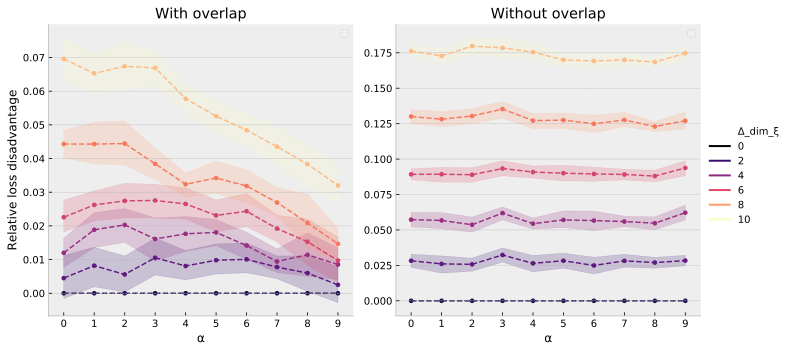

In [7]:
# Put legend on the top
facet_grid = sns.relplot(x='alpha_id', y='weighted best',
                        hue='Δ_dim_ξ', col='model_type', col_order=['overlap', 'no-overlap'],
                        data=data_seb[(data_seb.loss == 'loss')
                                     & (data_seb.clustering_id == 1)],
                        kind='line',facet_kws={"sharey":False},palette="magma", lw=0, legend='full')

loss_data = data_seb[(data_seb.loss == 'loss') & (data_seb.clustering_id == 1)].groupby(
                            ["alpha_id","Δ_dim_ξ","model_type"])["weighted best"].mean().reset_index()

facet_grid.set(ylabel='Loss')
for it,ovr_type in enumerate(["overlap","no-overlap"]):
    sns.pointplot(x='alpha_id', y='weighted best',errwidth=0,linestyles="--",scale=0.4,ax=facet_grid.axes[0][it],
                            hue='Δ_dim_ξ',
                            data=loss_data[loss_data.model_type==ovr_type],
                           palette="magma",legend=None);


facet_grid.axes[0][0].set_ylabel("Relative loss disadvantage")
facet_grid.axes[0][0].set_title("With overlap")
facet_grid.axes[0][0].legend("")
facet_grid.axes[0][0].set_xlabel("α")

facet_grid.axes[0][-1].set_ylabel("")
facet_grid.axes[0][-1].set_title("Without overlap")
facet_grid.axes[0][-1].legend("")
facet_grid.axes[0][-1].set_xlabel("α")

facet_grid.fig.savefig('loss-decrease-S2_S3.svg', bbox_inches='tight')

# Non Dependency of decrease with Network Size

In [10]:
base_dir = "/home/slerique/Code/nw2vec/data/behaviour/colors/"

net_small = pickle.load(open(base_dir+"S2_S3-ov_noov-n_nodes=250-n_clusters=25-n_alphas=10-n_models=20-n_clusterings=2-df_clipped.pkl","rb"))
net_med = pickle.load(open(base_dir+"S2_S3-ov_noov-n_nodes=500-n_clusters=50-n_alphas=10-n_models=20-n_clusterings=2-df.pkl","rb"))
net_big = pickle.load(open(base_dir+"S2_S3-ov_noov-n_nodes=1000-n_clusters=100-n_alphas=10-n_models=20-n_clusterings=2-df.pkl","rb"))

In [11]:
def rel_Δ_dim_ξ(data_ori,nb_nodes,loss_type = "loss"):
    dateb = data_ori.copy()
    max_clustering = max(dateb.clustering_id)
    dateb = dateb[dateb.clustering_id==max_clustering]
    if 'model_type' not in dateb.columns:
        dateb['model_type'] = ["overlap" for x in dateb.overlap]
        dateb.rename(index=str, columns={"sample_id": "sampling_id"},inplace=True)
    if 'Δ_dim_ξ' not in dateb.columns:
        if not('dim_ξ' in dateb.columns):
            max_overlap = max(dateb.overlap)
            dateb['dim_ξ'] = 2*max_overlap-dateb.overlap
        max_dim_ξ = max(dateb.dim_ξ)
        dateb['Δ_dim_ξ'] = max_dim_ξ - dateb.dim_ξ
    results_rel_Δ_dim_ξ = dateb.pivot_table(columns='Δ_dim_ξ',
                                              index=['alpha_id', 'clustering_id', 'model_type',
                                                     'sampling_id', 'loss'],
                                              values='weighted best')
    results_rel_Δ_dim_ξ = results_rel_Δ_dim_ξ.apply(
        lambda x: (x - results_rel_Δ_dim_ξ[0]) / results_rel_Δ_dim_ξ[0])
    
    pre_final = results_rel_Δ_dim_ξ.stack().reset_index().rename(columns={0: 'weighted best'})
    pre_final["nodes"] = [nb_nodes for x in pre_final.sampling_id]
    loss_data = pre_final[(pre_final.loss == loss_type) & (pre_final.clustering_id == max_clustering)].groupby(
                            ["alpha_id","Δ_dim_ξ","model_type","nodes"])["weighted best"].mean().reset_index()
    

    return pre_final,loss_data


In [12]:
data_small,net_small_rel_Δ_dim_ξ = rel_Δ_dim_ξ(net_small,250)
data_med,net_med_rel_Δ_dim_ξ = rel_Δ_dim_ξ(net_med,500)
data_big,net_big_rel_Δ_dim_ξ = rel_Δ_dim_ξ(net_big,1000)

In [13]:
non_dep_small = data_small[(data_small.loss == 'loss') & (data_small.clustering_id == 1) &
                           (data_small.Δ_dim_ξ == max(data_small.Δ_dim_ξ))&(data_small.model_type == "overlap")]

non_dep_med = data_med[(data_med.loss == 'loss') & (data_med.clustering_id == 1)&
                       (data_med.Δ_dim_ξ == max(data_med.Δ_dim_ξ))&(data_med.model_type == "overlap")]

non_dep_big = data_big[(data_big.loss == 'loss') & (data_big.clustering_id == 1)&
                       (data_big.Δ_dim_ξ == max(data_big.Δ_dim_ξ))&(data_big.model_type == "overlap")]

non_dependency_data = pd.concat([non_dep_small,non_dep_med,non_dep_big],axis=0).reset_index()
net_non_dep = pd.concat(
    [
    net_small_rel_Δ_dim_ξ[net_small_rel_Δ_dim_ξ.Δ_dim_ξ == max(net_small_rel_Δ_dim_ξ.Δ_dim_ξ)],
    net_med_rel_Δ_dim_ξ[net_med_rel_Δ_dim_ξ.Δ_dim_ξ == max(net_med_rel_Δ_dim_ξ.Δ_dim_ξ)],
    net_big_rel_Δ_dim_ξ[net_big_rel_Δ_dim_ξ.Δ_dim_ξ == max(net_big_rel_Δ_dim_ξ.Δ_dim_ξ)],
    ],axis=0)

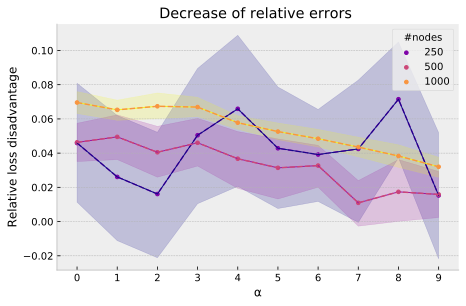

In [14]:
facet_grid = sns.relplot(x='alpha_id', y='weighted best',hue='nodes',
                        data=non_dependency_data[non_dependency_data.loss == 'loss'],
                        kind='line',palette="plasma", lw=1,legend=False)

sns.pointplot(x='alpha_id', y='weighted best',errwidth=0,linestyles="--",scale=0.4,
              hue='nodes',palette="plasma",
              data=net_non_dep[net_non_dep.model_type=="overlap"],ax=facet_grid.axes[0][0]);

facet_grid.axes[0][0].set_ylabel("Relative loss disadvantage")
facet_grid.axes[0][0].set_title("Decrease of relative errors ")
facet_grid.axes[0][0].legend(title="#nodes")
facet_grid.axes[0][0].set_xlabel("α")
facet_grid.fig.set_figwidth(7)
facet_grid.fig.set_figheight(4)

facet_grid.fig.savefig('loss-decrease-different-n_nodes.svg', bbox_inches='tight')